# ML Projekt SS25 Gruppe 256378

## Mitglieder 
(Soll das noch raus? Kommt eigentlich in dem Email Body, mehr als Platzhalter hier)

### Namen: David Sprengart, Florian Hertel, Lars Hoffmann
### RZ-Kürzel: spda1019, hefl1025, hola1017
### Studiengang: INFB, INFB, INFB

## Aufgabe

### 1. Laden Sie die Trainingsdaten.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("./data/train.csv", sep=';')

### 2. Führen Sie eine kurze EDA durch

#### Plotten Sie Histogramme zu den Features customerType und totalAmount

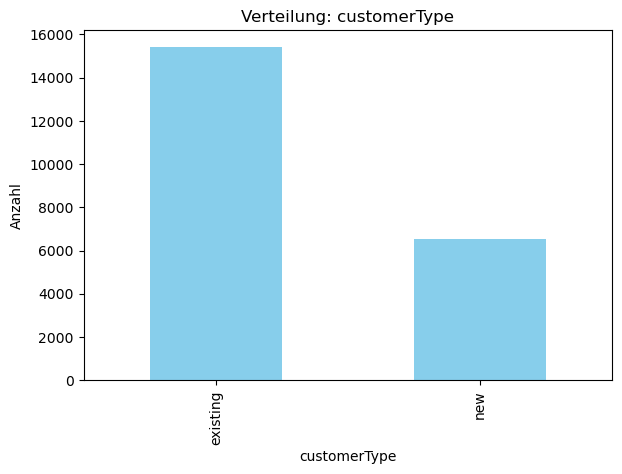

In [2]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
train_df['customerType'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Verteilung: customerType")
plt.xlabel("customerType")
plt.ylabel("Anzahl")
plt.show()

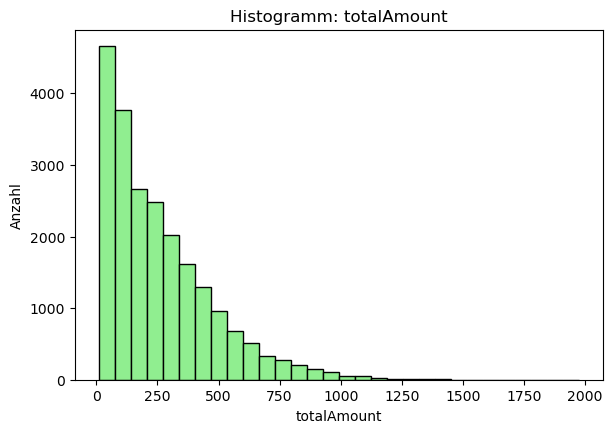

In [3]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 2)
plt.hist(train_df['totalAmount'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Histogramm: totalAmount")
plt.xlabel("totalAmount")
plt.ylabel("Anzahl")
plt.show()

#### Ermitteln sie die Verteilung (Histogramm) von returnLabel i) über alle Daten ii) in Abhängigkeit zu allen Ausprägungen von customerType.

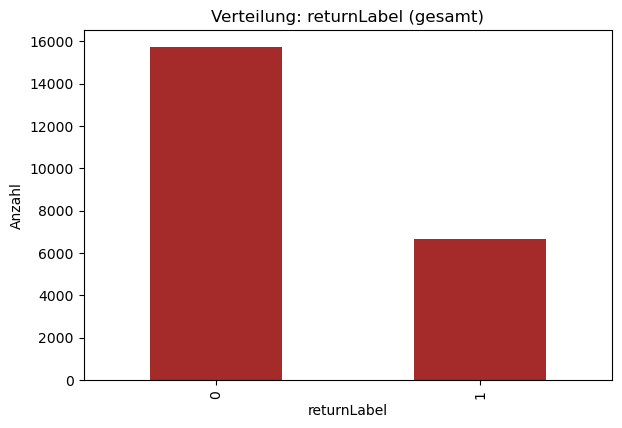

In [4]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 2)
train_df['returnLabel'].value_counts().sort_index().plot(kind='bar',color ='brown')
plt.title("Verteilung: returnLabel (gesamt)")
plt.xlabel("returnLabel")
plt.ylabel("Anzahl")
plt.show()

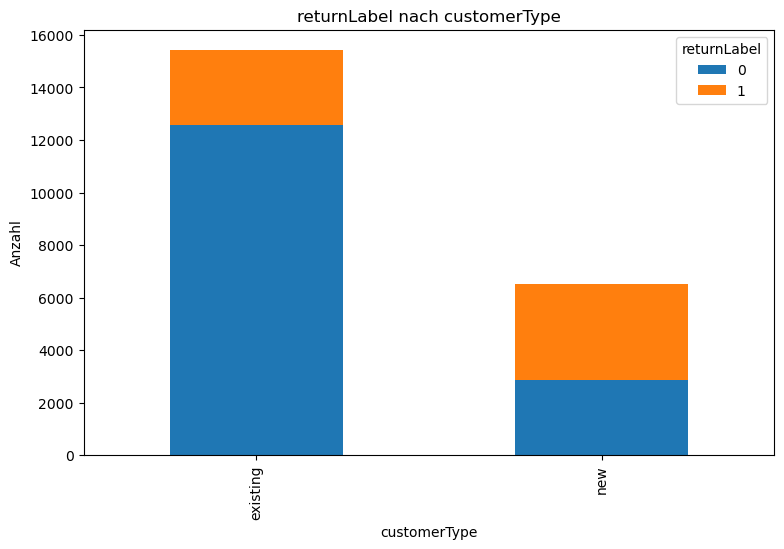

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
pd.crosstab(train_df['customerType'], train_df['returnLabel']).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title("returnLabel nach customerType")
plt.xlabel("customerType")
plt.ylabel("Anzahl")

plt.tight_layout()
plt.show()

#### Erstellen Sie einen Boxplot für totalAmount in Abhängigkeit des Labels (nutzen Sie dafür den Parameter by=…)

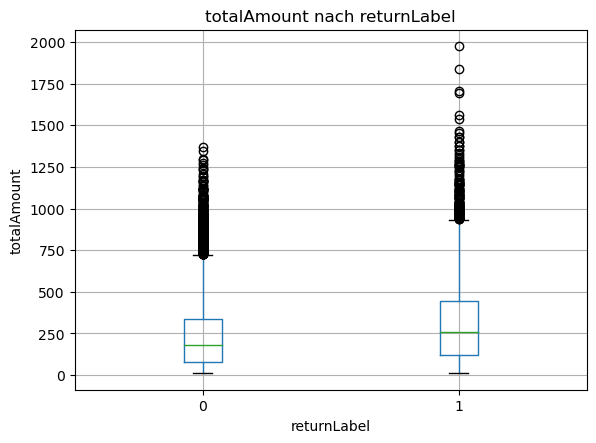

In [6]:
train_df.boxplot(column='totalAmount', by='returnLabel')
plt.title("totalAmount nach returnLabel")
plt.suptitle("") 
plt.xlabel("returnLabel")
plt.ylabel("totalAmount")
plt.show()

#### Installieren Sie das Seaborn-Package und erstellen Sie einen displot für totalAmount in Abhängigkeit des Labels, wie hier beschrieben.

C:\Users\david\miniconda3\envs\ml-course\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


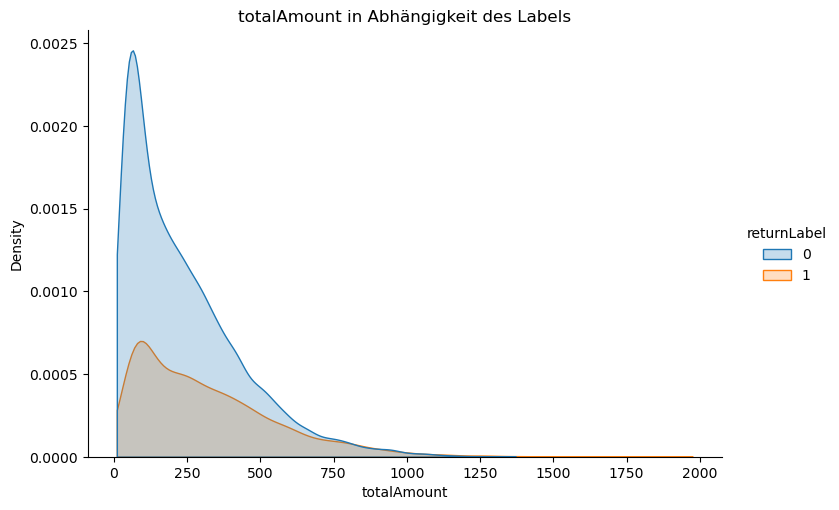

In [9]:
sns.displot(train_df, x="totalAmount", hue="returnLabel", kind = "kde", cut = 0,  fill = "true",  aspect=1.5)
plt.title("totalAmount in Abhängigkeit des Labels")
plt.xlabel("totalAmount")
plt.show()
# TODO: Behebe Fehlermeldung? -> "Warten Sie bis alle Zellen fehlerfrei ausgeführt wurden"

### 3. Füllen Sie fehlende Werte in den Trainingsdaten auf.

In [10]:
train_df.isnull().sum()

transactionId      0
basket             0
customerType     442
totalAmount      477
returnLabel        0
dtype: int64

In [11]:
train_df['customerType'].fillna(train_df['customerType'].mode()[0], inplace = True)
train_df['totalAmount'].fillna(train_df['totalAmount'].median(), inplace = True)
train_df.isnull().sum()

transactionId    0
basket           0
customerType     0
totalAmount      0
returnLabel      0
dtype: int64